Author: Vera Lake \n
Course: D212 - Task 3 - ASSOCIATION RULES AND LIFT ANALYSIS

# Scenario
One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.


You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to perform a market basket analysis to analyze customer data to identify key associations of your customer purchases, ultimately allowing better business and strategic decision-making.

# Data Dictionary
In the telecommunications industry, customers can choose from multiple service providers
and actively switch from one provider to another. Customer “churn” is defined as the
percentage of customers who stopped using a provider’s product or service during a certain
time frame. In this highly competitive market, some telecommunications industries can
experience average annual churn rates as high as 25 percent. Given that it costs 10 times
more to acquire a new customer than to retain an existing one, customer retention has now
become even more important than customer acquisition.

For many providers, retaining highly profitable customers is the number one business goal.
To reduce customer churn, telecommunications companies need to predict which customers
are at high risk of churn.

You are an analyst on a team of analysts in a popular telecommunications company, which
serves customers in all regions of the United States. One plan to reduce churn is to offer
customers discounts on items of interest. The executive team is not sure which items
customers typically buy together and has reached out to you for help. You have been asked
to analyze the data set to explore data on the purchase habits of customers.

**Data File Being Used:**
teleco_market_basket.csv

**The data set includes the following information:**
- Items purchased from previous customers (prior 2 years) as based on historical data
- Purchase history reflects all historical purchases (not just at a single moment)
- Data is limited to items related to technological areas
- Data might need some cleaning and preparation (depending on tools used)

**The data set consists of 7,501 customer purchase history and 20 columns/variables:**
- Item01-Item20: Item that customer bought

# Part I: Research Question

## A.  Describe the purpose of this data mining report by doing the following:

### A1.  Propose one question relevant to a real-world organizational situation that you will answer using market basket analysis.
*Rubric: The submission proposes 1 question answered using market basket analysis that is relevant to a real-world organizational situation.*

Which items do customers typically buy together?

### A2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
*Rubric: The submission defines 1 reasonable goal for data analysis that is within the scope of the scenario and is represented in the available data.*

One goal of the data analysis is to identify which items customers typically buy together. With this knowledge TeleCo can create a churn reduction plan that includes discounts for items of interest.


# Part II: Market Basket Justification

## B.  Explain the reasons for using market basket analysis by doing the following:

### B1.  Explain how market basket analyzes the selected dataset. Include expected outcomes.
*Rubric: The submission logically explains how market basket analyzes the selected dataset and includes accurate expected outcomes.*



In [1]:
# Data Exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Preparation and Modeling
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
# Aesthetics
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plots for explratory data anlysis
sns.set_style=('whitegrid')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Read the raw data
mba_data = pd.read_csv('./Market Basket Data/teleco_market_basket.csv')

In [5]:
# Look at the data we have
mba_data.head(10)

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mba_data.describe()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Apple USB-C Charger cable,USB 2.0 Printer cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,ARRIS SURFboard SB8200 Cable Modem,3A USB Type C Cable 3 pack 6FT,SanDisk Ultra 128GB card,Brother Genuine High Yield Toner Cartridge,NETGEAR Nighthawk WiFi Router,FEIYOLD Blue light Blocking Glasses
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


### B2.  Provide one example of transactions in the dataset.
*Rubric: The submission includes 1 accurate example of transactions in the dataset.*
Let's take a look at the first transaction of our data: 

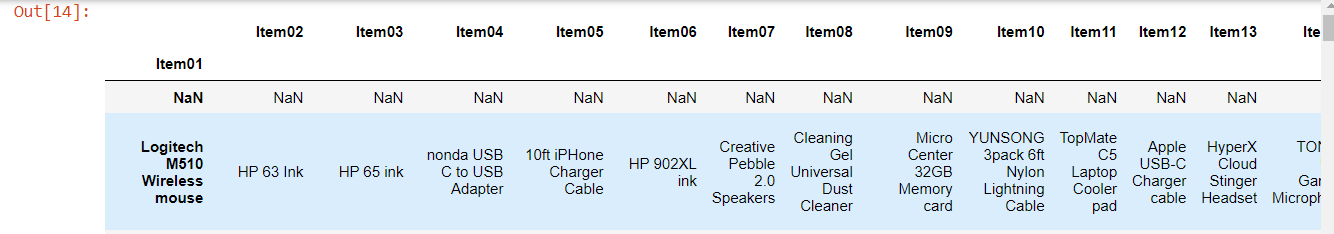

In this transaction we might infer that the purchase of Item 01: Logitech M510 Wireless mouse implies that the next customer will also a purchase of Item 2: HP 62 Ink within the same transaction.

        {Logitech M510 Wireless mouse} -> {HP 63 Ink} 
        
With our information limited to one row out of 7,501 it would not be wise to make decisions based on the first transaction alone due to low confidence levels. But in conjunction with all the other rows we can use the association analysis's Market Basket Analysis method for more accurate answers.

# Transactions
It looks like the Item 01 feature represents the first item that a customer bought and Items 02-Item 20 represent the subsequent purchases. 

**Item Counts of significance:**
- 7,501 or 100% of customers purchased 1 item
- 5,747 or 76.62% customers purchased a second item
- 4,389 or 58.51% of customers purchased a third item
- 3,345 or 44.59% customers purchased a fourth item
- 2,529 or 33.72% customers purchased a fifth item
- 1,864 or 24.85% customers purchased a sixth item
- 1,369 or 18.25% customers purchased a seventh item
- 981 or 13.09% customers purchased an eighth item
- 654 or 8.71% customers purchased a ninth item

Items 10-20 may not hold statistical significance to our outcome due to the low percentage of customers who bought a 10th-20th item. We will keep them in mind for the rest of the exploration anyways. 

**Unique count of Items in each feature for Items 01-09:**
- Item 01: 115 unique items were purchased
- Item 02: 117 unique items were purchased
- Item 03: 115 unique items were purchased
- Item 04: 114 unique items were purchased
- Item 05: 110 unique items were purchased
- Item 06: 106 unique items were purchased
- Item 07: 102 unique items were purchased
- Item 08: 97 unique items were purchased
- Item 09: 88 unique items were purchased					

**Top item purchased & Frequency for Items 01-20:**
- Item 01: Dust-Off Compressed Gas 2 pack -> 577 transactions
- Item 02: Dust-Off Compressed Gas 2 pack -> 484 transactions
- Item 03: Dust-Off Compressed Gas 2 pack -> 375 transactions
- Item 04: Dust-Off Compressed Gas 2 pack -> 201 transactions
- Item 05: Apple USB-C Charger cable -> 153 transactions
- Item 06: USB 2.0 Printer cable -> 107 transactions
- Item 07: Apple USB-C Charger cable -> 96 transactions
- Item 08: Apple USB-C Charger cable -> 67 transactions
- Item 09: Apple USB-C Charger cable -> 57 transactions
- Item 10: Apple USB-C Charger cable -> 31 transactions
- Item 11: TopMate C5 Laptop Cooler pad -> 22 transactions
- Item 12: Apple USB-C Charger cable -> 15 transactions
- Item 13: Apple USB-C Charger cable -> 8 transactions
- Item 14: Apple USB-C Charger cable -> 4 transactions
- Item 15: ARRIS SURFboard SB8200 Cable Modem -> 3 transactions
- Item 16: SanDisk Extreme 128GB card -> 1 transactions
- Item 17: SanDisk Ultra 128GB card -> 2 transactions
- Item 18: Brother Genuine High Yield Toner Cartridge -> 2 transactions
- Item 19: FEEL2NICE 5 pack 10ft Lighning cable -> 1 transactions
- Item 20: FEIYOLD Blue light Blocking Glasses -> 1 transactions


### B3.  Summarize one assumption of market basket analysis.
*Rubric: The submission adequately summarizes 1 assumption of market basket analysis.*
Source: http://wak2.web.rice.edu/bio/My%20Reprints/Sequential%20Market%20Basket%20Analysist.pdf

Market Basket Analysis assumes that joint occurrence (measured by support and interest) implies complementarity. 

# Part III: Data Preparation and Analysis

## C.  Prepare and perform market basket analysis by doing the following:

### C1.  Transform the dataset to make it suitable for market basket analysis. Include a copy of the cleaned dataset.
*Rubric: The submission transforms the dataset to make it suitable for market basket analysis and includes a copy of the cleaned dataset.*

Step 1: Drop rows where Item 01 is NaN
Step 2: Remove spaces from item names

In [7]:
# Step 1: Drop rows where Item 01 is NaN
# Source: https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe#:~:text=Pandas%20DataFrame%20dropna()%20function%20is%20used%20to%20remove%20rows,NaT%2C%20and%20numpy.
mba_data = mba_data.dropna(how='all')
mba_data.shape

(7501, 20)

In [8]:
# Drop rows with only one item purchased
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
mba_data.dropna(subset=['Item02'], inplace=True)

In [9]:
mba_data.describe()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
count,5747,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,104,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,Apple Lightning to Digital AV Adapter,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Apple USB-C Charger cable,USB 2.0 Printer cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,ARRIS SURFboard SB8200 Cable Modem,3A USB Type C Cable 3 pack 6FT,SanDisk Ultra 128GB card,Brother Genuine High Yield Toner Cartridge,NETGEAR Nighthawk WiFi Router,FEIYOLD Blue light Blocking Glasses
freq,556,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [10]:
# Source: https://wgu.udemy.com/course/data-mining-python/learn/lecture/25652704#overview
# Transactions List
transactions = []
for i in range (0, len(mba_data)):
    transactions.append([str(mba_data.values[i,j])
                        for j in range (0,20)])
transactions[0]
transactions[1]

['Apple Lightning to Digital AV Adapter',
 'TP-Link AC1750 Smart WiFi Router',
 'Apple Pencil',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [11]:
# Encode the transactions
transaction_encoder = TransactionEncoder()
encoded_transactions = transaction_encoder.fit_transform(transactions)
encoded_transactions_df = pd.DataFrame(encoded_transactions, 
                                       columns=transaction_encoder.columns_)
encoded_transactions_df.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,Apple Lightning to USB cable,Apple Magic Mouse 2,Apple Pencil,Apple Pencil 2nd Gen,Apple Power Adapter Extension Cable,Apple USB-C Charger cable,AutoFocus 1080p Webcam,BENGOO G90000 headset,Blue Light Blocking Glasses,Blue Light Blocking Glasses 2pack,Brother Genuine High Yield Toner Cartridge,Cat 6 Ethernet Cable 50ft,Cat8 Ethernet Cable,CicTsing MM057 2.4G Wireless Mouse,Cleaning Gel Universal Dust Cleaner,Creative Pebble 2.0 Speakers,DisplayPort ot HDMI adapter,Dust-Off Compressed Gas,Dust-Off Compressed Gas 2 pack,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses,Falcon Dust Off Compressed Gas,HOVAMP Mfi 6pack Lightning Cable,HOVAMP iPhone charger,HP 61 2 pack ink,HP 61 Tri-color ink,HP 61 ink,HP 62XL Tri-Color ink,HP 62XL ink,HP 63 Ink,HP 63 Tri-color ink,HP 63XL Ink,HP 63XL Tri-color ink,HP 64 Tri-Color ink,HP 64 ink,HP 65 ink,HP 902XL ink,HP 952 ink,HP ENVY 5055 printer,HP952XL ink,HooToo USB C Hub,HyperX Cloud Stinger Headset,Jelly Comb 2.4G Slim Wireless mouse,Leader Desk Pad Protector,Logitech M510 Wireless mouse,Logitech MK270 Wireless Keyboard/Mouse,Logitech MK345 Wireless combo,Logitech USB H390 headset,M.2 Screw kit,Mfi-Certified Lightning to USB A Cable,Micro Center 32GB Memory card,Microsot Surface Dock 2,Moread HDMI to VGA Adapter,Mpow HC6 USB Headset,NETGEAR CM500 Cable Modem,NETGEAR Nighthawk WiFi Router,NETGEAR Orbi Home Mesh WiFi System,Nylon Braided Lightning to USB cable,PS4 Headset,Premium Nylon USB Cable,RUNMUS Gaming Headset,SAMSUNG 128GB card,SAMSUNG 256 GB card,SAMSUNG EVO 32GB card,SAMSUNG EVO 64GB card,Sabrent 4-port USB 3.0 hub,SanDisk 128GB Ultra microSDXC card,SanDisk 128GB card,SanDisk 128GB microSDXC card,SanDisk 32GB Ultra SDHC card,SanDisk 32GB card,SanDisk Extreme 128GB card,SanDisk Extreme 256GB card,SanDisk Extreme 32GB 2pack card,SanDisk Extreme Pro 128GB card,SanDisk Extreme Pro 64GB card,SanDisk Ultra 128GB card,SanDisk Ultra 256GB card,SanDisk Ultra 400GB card,SanDisk Ultra 64GB card,Screen Mom Screen Cleaner kit,Stylus Pen for iPad,Syntech USB C to USB Adapter,TONOR USB Gaming Microphone,TP-Link AC1750 Smart WiFi Router,TP-Link AC4000 WiFi router,TopMate C5 Laptop Cooler pad,UNEN Mfi Certified 5-pack Lightning Cable,USB 2.0 Printer cable,USB C to USB Male Adapter,USB Type C Cable,USB Type C to USB-A Charger cable,VIVO Dual LCD Monitor Desk mount,VicTsing Mouse Pad,VicTsing Wireless mouse,Vsco 70 pack stickers,Webcam with Microphone,XPOWER A-2 Air Pump blower,YUNSONG 3pack 6ft Nylon Lightning Cable,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [12]:
# Save a copy of the cleaned data
encoded_transactions_df.to_csv('./Market Basket Data/encoded_transactions_df')

### C2.  Execute the code used to generate association rules with the Apriori algorithm. Provide screenshots that demonstrate the error-free functionality of the code.
*Rubric: The submission executes the code used to generate association rules with the Apriori algorithm and provides screenshots that demonstrate the error-free execution of the code.*



In [13]:
# Remove nan column
encoded_transactions_df.drop(columns = 'nan', inplace=True)
encoded_transactions_df.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,Apple Lightning to USB cable,Apple Magic Mouse 2,Apple Pencil,Apple Pencil 2nd Gen,Apple Power Adapter Extension Cable,Apple USB-C Charger cable,AutoFocus 1080p Webcam,BENGOO G90000 headset,Blue Light Blocking Glasses,Blue Light Blocking Glasses 2pack,Brother Genuine High Yield Toner Cartridge,Cat 6 Ethernet Cable 50ft,Cat8 Ethernet Cable,CicTsing MM057 2.4G Wireless Mouse,Cleaning Gel Universal Dust Cleaner,Creative Pebble 2.0 Speakers,DisplayPort ot HDMI adapter,Dust-Off Compressed Gas,Dust-Off Compressed Gas 2 pack,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses,Falcon Dust Off Compressed Gas,HOVAMP Mfi 6pack Lightning Cable,HOVAMP iPhone charger,HP 61 2 pack ink,HP 61 Tri-color ink,HP 61 ink,HP 62XL Tri-Color ink,HP 62XL ink,HP 63 Ink,HP 63 Tri-color ink,HP 63XL Ink,HP 63XL Tri-color ink,HP 64 Tri-Color ink,HP 64 ink,HP 65 ink,HP 902XL ink,HP 952 ink,HP ENVY 5055 printer,HP952XL ink,HooToo USB C Hub,HyperX Cloud Stinger Headset,Jelly Comb 2.4G Slim Wireless mouse,Leader Desk Pad Protector,Logitech M510 Wireless mouse,Logitech MK270 Wireless Keyboard/Mouse,Logitech MK345 Wireless combo,Logitech USB H390 headset,M.2 Screw kit,Mfi-Certified Lightning to USB A Cable,Micro Center 32GB Memory card,Microsot Surface Dock 2,Moread HDMI to VGA Adapter,Mpow HC6 USB Headset,NETGEAR CM500 Cable Modem,NETGEAR Nighthawk WiFi Router,NETGEAR Orbi Home Mesh WiFi System,Nylon Braided Lightning to USB cable,PS4 Headset,Premium Nylon USB Cable,RUNMUS Gaming Headset,SAMSUNG 128GB card,SAMSUNG 256 GB card,SAMSUNG EVO 32GB card,SAMSUNG EVO 64GB card,Sabrent 4-port USB 3.0 hub,SanDisk 128GB Ultra microSDXC card,SanDisk 128GB card,SanDisk 128GB microSDXC card,SanDisk 32GB Ultra SDHC card,SanDisk 32GB card,SanDisk Extreme 128GB card,SanDisk Extreme 256GB card,SanDisk Extreme 32GB 2pack card,SanDisk Extreme Pro 128GB card,SanDisk Extreme Pro 64GB card,SanDisk Ultra 128GB card,SanDisk Ultra 256GB card,SanDisk Ultra 400GB card,SanDisk Ultra 64GB card,Screen Mom Screen Cleaner kit,Stylus Pen for iPad,Syntech USB C to USB Adapter,TONOR USB Gaming Microphone,TP-Link AC1750 Smart WiFi Router,TP-Link AC4000 WiFi router,TopMate C5 Laptop Cooler pad,UNEN Mfi Certified 5-pack Lightning Cable,USB 2.0 Printer cable,USB C to USB Male Adapter,USB Type C Cable,USB Type C to USB-A Charger cable,VIVO Dual LCD Monitor Desk mount,VicTsing Mouse Pad,VicTsing Wireless mouse,Vsco 70 pack stickers,Webcam with Microphone,XPOWER A-2 Air Pump blower,YUNSONG 3pack 6ft Nylon Lightning Cable,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

### C3.  Provide values for the support, lift, and confidence of the association rules table.
*Rubric: The submission includes accurate values for the support, lift, and confidence of the association rules table.*

In [14]:
#ARL
model = apriori(encoded_transactions_df, min_support=0.03, use_colnames=True) # each item appears in the transactions at leat 3% of the time

# confidence bust be at least 30%
results = association_rules(model,
                           metric='confidence',
                           min_threshold = 0.3)
results.sort_values(by = 'lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.124587,0.218201,0.051157,0.410615,1.881820,0.023972,1.326465
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.064555,0.294936,0.030103,0.466307,1.581043,0.011063,1.321104
2,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.110318,0.218897,0.037585,0.340694,1.556414,0.013436,1.184735
4,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.081956,0.294936,0.036019,0.439490,1.490119,0.011847,1.257897
8,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.124587,0.294936,0.053419,0.428771,1.453774,0.016674,1.234292
14,(Nylon Braided Lightning to USB cable),(VIVO Dual LCD Monitor Desk mount),0.121107,0.218201,0.036367,0.300287,1.376197,0.009941,1.117315
7,(Nylon Braided Lightning to USB cable),(Dust-Off Compressed Gas 2 pack),0.121107,0.294936,0.046633,0.385057,1.305561,0.010914,1.146552
9,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.163390,0.294936,0.062641,0.383387,1.299895,0.014452,1.143445
10,(Stylus Pen for iPad),(Dust-Off Compressed Gas 2 pack),0.117279,0.294936,0.044023,0.375371,1.272718,0.009433,1.128772
1,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.085958,0.294936,0.031843,0.370445,1.256017,0.006491,1.119940


### C4.  Identify the top three rules generated by the Apriori algorithm. Include a screenshot of the top rules along with their summaries.
*Rubric: The submission includes a screenshot and accurately identifies the top 3 rules generated by the Apriori algorithm along with their summaries.*

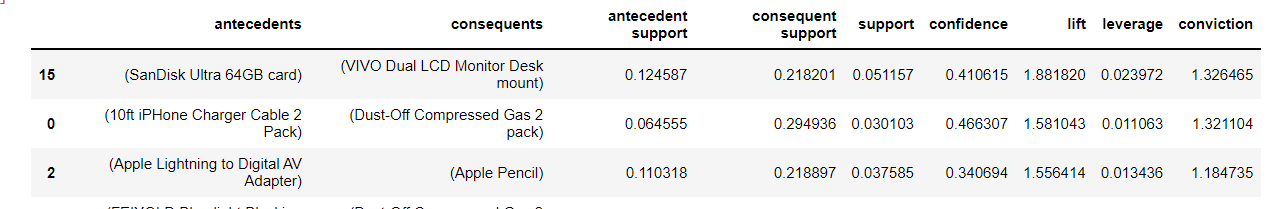

**Top Rule 1**
{ SanDisk Ultra 64GB card } => { VIVO Dual LCD Monitor Desk mount } \n
If a consumer buys a 'SanDisk Ultra 64GB card' they are 88% more likely to buy 'VIVO Dual LCD Monitor Desk mount' too.
	

**Top Rule 2**
{ 10ft iPHone Charger Cable 2 Pack } => { Dust-Off Compressed Gas 2 pack } \n
If a consumer buys a '10ft iPHone Charger Cable 2 Pack' they are 58% more likely to buy 'Dust-Off Compressed Gas 2 pack' too.

**Top Rule 3**
{ Apple Lightning to Digital AV Adapter } => { Apple Pencil } \n
If a consumer buys a 'Apple Lightning to Digital AV Adapter' they are 56% more likely to buy 'Apple Pencil' too.

# Part IV: Data Summary and Implications

## D.  Summarize your data analysis by doing the following:

### D1.  Summarize the significance of support, lift, and confidence from the results of the analysis.
*Rubric: The submission adequately summarizes the significance of support, lift, and confidence from the results of the analysis.*

Source: https://towardsdatascience.com/apriori-algorithm-for-association-rule-learning-how-to-find-clear-links-between-transactions-bf7ebc22cf0a

**Support** can be thought of as this formula

*Support(A) = Transactions(A) / Total Transactions*

which calculates how frequently an item is purchased.

**Confidence** can be thought of as this formula

*Confidence(A→B) = Probability(A & B) / Support(A)*

and can calculate the confidence level of the data that if an will be purchased, based on a previous purchase of another item.

**Lift** can be thought of as this formula

*Lift(A→B) = Probability(A & B) / (Support(A) * Support(B))*

and can calculate the association between the two items in a rule.

### D2.  Discuss the practical significance of the findings from the analysis.
*Rubric: The submission adequately discusses the practical significance of the findings from the analysis.*

The practical significance of the findings from the analysis are
- There are 16 items that with 30% confidence have association rules
- The rules are listed by priority of lift in the data table
- The range of lift for the rules is 1.02 - 1.88 where the first rule with 1.88 lift can be used with over 80% higher probability of success over the last rule of 1.02

### D3.  Recommend a course of action for the real-world organizational situation from part A1 based on your results from part D1.
*Rubric: The submission adequately recommends a course of action for the real-world organizational situation from part A1 based on the results from part D1.*

It is recommended that TeleCo use the association rule table as a way to create a solutions for product recommendations at checkout or other applications of the knowledge they have in mind.



# Part V: Attachments

## E.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
*Rubric: The submission provides a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.*
 

Note: The audiovisual recording should feature you visibly presenting the material (i.e., not in voiceover or embedded video) and should simultaneously capture both you and your multimedia presentation.
 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 

To submit your recording, upload it to the Panopto drop box titled “Data Mining II – OFM3.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.
 

## F.  Record all web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.
*Rubric: The submission records all web sources used to acquire data or segments of third-party code, and the web sources are reliable.*
1. https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe#:~:text=Pandas%20DataFrame%20dropna()%20function%20is%20used%20to%20remove%20rows,NaT%2C%20and%20numpy.
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
3. https://wgu.udemy.com/course/data-mining-python/learn/lecture/25652704#overview

## G.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
*Rubric: The submission includes in-text citations for sources that are properly quoted, paraphrased, or summarized and a reference list that accurately identifies the author, date, title, and source location as available.*

1. http://wak2.web.rice.edu/bio/My%20Reprints/Sequential%20Market%20Basket%20Analysist.pdf
2. https://towardsdatascience.com/apriori-algorithm-for-association-rule-learning-how-to-find-clear-links-between-transactions-bf7ebc22cf0a

 

## H.  Demonstrate professional communication in the content and presentation of your submission.
*Rubric: Content reflects attention to detail, is organized, and focuses on the main ideas as prescribed in the task or chosen by the candidate. Terminology is pertinent, is used correctly, and effectively conveys the intended meaning. Mechanics, usage, and grammar promote accurate interpretation and understanding.*